https://archive.ics.uci.edu/ml/datasets/HTRU2

Data Set Information:

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South) [1].

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter (see [2] for more uses).

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Candidates are stored in both files in separate rows. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class
	
	HTRU 2 Summary
	
	17,898 total examples.
	1,639 positive examples.
	16,259 negative examples.
	

In [1]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

загружаю датасет и сразу привожу его к читабельному виду

In [2]:
features = ['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve',
'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']
target = 'class'

data = pd.read_csv('HTRU_2.csv', sep=',', index_col=False, names=features + [target])

In [3]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
Standard deviation of the integrated profile,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
Excess kurtosis of the integrated profile,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness of the integrated profile,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean of the DM-SNR curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392140
Standard deviation of the DM-SNR curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
Excess kurtosis of the DM-SNR curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness of the DM-SNR curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309331,1191.000837
class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


In [5]:
data['class'].value_counts()

0    16259
1     1639
Name: class, dtype: int64

In [6]:
print(f'Датасет содержит {(data[data["class"] == 1].shape[0])/data.shape[0]:.3f}% элементов классифицируемых как пульсар.')

Датасет содержит 0.092% элементов классифицируемых как пульсар.


In [7]:
data.isnull().sum()
# пропусков в данных нет

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
class                                           0
dtype: int64

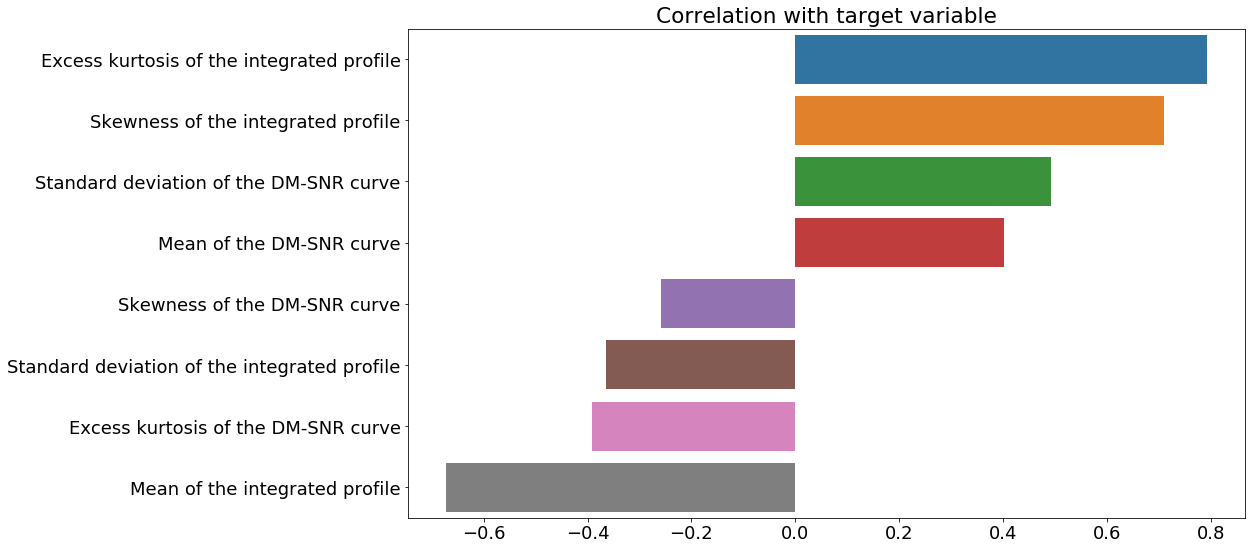

In [8]:
plt.rcParams.update({'font.size': 18})
corr = data.corr()['class'].sort_values(ascending=False)[1:]
plt.figure(figsize=(15 ,9))
sns.barplot(x=corr.values, y=corr.index)
plt.title('Correlation with target variable')
plt.show()

топ-4 признака по уровню коррелияции с целевой переменной:
Mean of the integrated profile.
1. Excess kurtosis of the integrated profile.
2. Skewness of the integrated profile.
3. Standard deviation of the DM-SNR curve.
4. Mean of the DM-SNR curve.

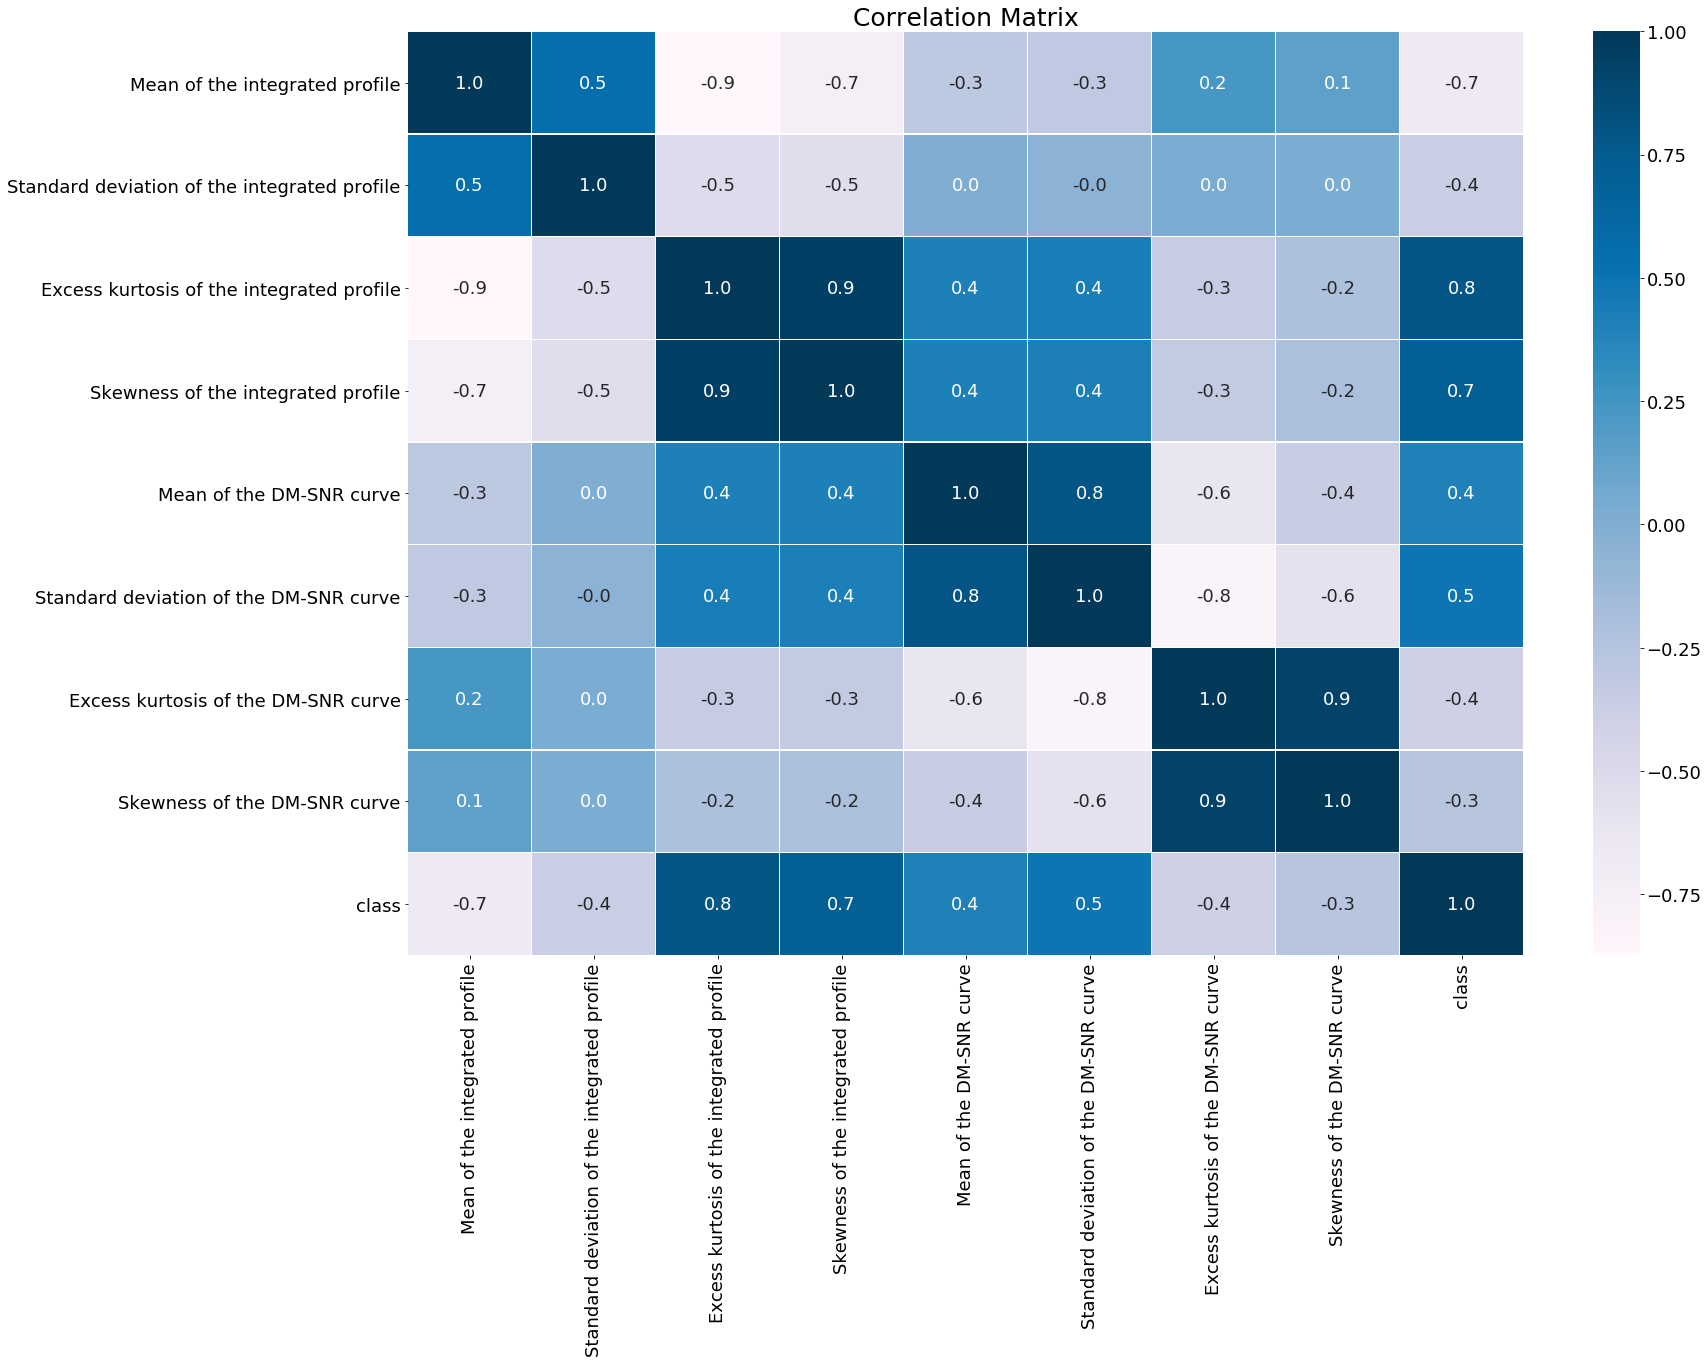

In [9]:
# матрица корреляции 
f, ax = plt.subplots(figsize = [25, 17])
sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'PuBu' )
ax.set_title('Correlation Matrix', fontsize=25)
plt.show()

In [10]:
from pycaret.classification import *
clf1 = setup(data = data, 
             target = 'class',
             silent = True)

,Description,Value
0,session_id,4853
1,Target,class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(17898, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9792,0.9769,0.8368,0.9248,0.8778,0.8664,0.8682,3.9700
rf,Random Forest Classifier,0.9787,0.9658,0.8279,0.9280,0.8741,0.8625,0.8648,0.4690
xgboost,Extreme Gradient Boosting,0.9787,0.9719,0.8395,0.9168,0.8756,0.8640,0.8655,0.6640
lr,Logistic Regression,0.9786,0.9735,0.8128,0.9415,0.8719,0.8603,0.8634,0.4900
et,Extra Trees Classifier,0.9786,0.9675,0.8253,0.9292,0.8732,0.8616,0.8639,0.2400
lightgbm,Light Gradient Boosting Machine,0.9784,0.9765,0.8395,0.9145,0.8744,0.8627,0.8642,0.2210
gbc,Gradient Boosting Classifier,0.9767,0.9746,0.8413,0.8934,0.8658,0.8531,0.8540,0.6490
ada,Ada Boost Classifier,0.9764,0.9755,0.8048,0.9228,0.8591,0.8463,0.8490,0.1800
lda,Linear Discriminant Analysis,0.9744,0.9717,0.7576,0.9460,0.8411,0.8273,0.8335,0.0160
knn,K Neighbors Classifier,0.9715,0.9310,0.7700,0.8988,0.8284,0.8130,0.8165,0.0690


для дальнейшей работы выбреы модель catboost classifier: у нее максимальное значение AUC и я хотел посмотреть что эта модель из себя представляет.

In [14]:
model_cbc = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9785,0.9671,0.8304,0.9208,0.8732,0.8615,0.8629
1,0.9785,0.9804,0.8482,0.9048,0.8756,0.8638,0.8643
2,0.9808,0.9719,0.8125,0.9681,0.8835,0.8731,0.8771
3,0.9792,0.9786,0.8036,0.9574,0.8738,0.8626,0.8665
4,0.9745,0.9745,0.8304,0.8774,0.8532,0.8392,0.8396
5,0.9761,0.9526,0.7768,0.9457,0.8529,0.8400,0.8449
6,0.9808,0.9836,0.9027,0.8870,0.8947,0.8842,0.8842
7,0.9792,0.9863,0.8319,0.9307,0.8785,0.8672,0.8688
8,0.9792,0.9874,0.8482,0.9135,0.8796,0.8683,0.8690
9,0.9848,0.9865,0.8839,0.9429,0.9124,0.9041,0.9047


In [15]:
tuned_cbc = tune_model(model_cbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9769,0.9646,0.7946,0.9368,0.8599,0.8474,0.8508
1,0.9816,0.9783,0.8482,0.9406,0.8920,0.8820,0.8834
2,0.9785,0.9576,0.7946,0.9570,0.8683,0.8567,0.8611
3,0.9808,0.9732,0.8125,0.9681,0.8835,0.8731,0.8771
4,0.9753,0.9755,0.8482,0.8716,0.8597,0.8462,0.8463
5,0.9753,0.9554,0.7589,0.9551,0.8458,0.8325,0.8390
6,0.9800,0.9816,0.9027,0.8793,0.8908,0.8799,0.8799
7,0.9800,0.9765,0.8407,0.9314,0.8837,0.8728,0.8742
8,0.9792,0.9822,0.8571,0.9057,0.8807,0.8694,0.8698
9,0.9856,0.9827,0.8839,0.9519,0.9167,0.9088,0.9096


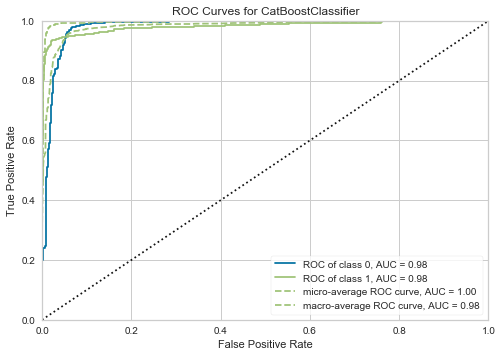

In [17]:
plot_model(estimator = tuned_cbc, plot = 'auc')

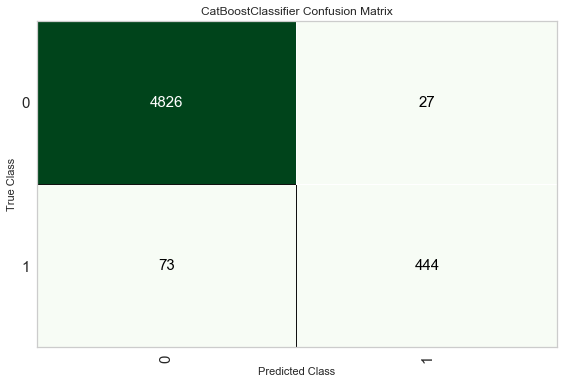

In [18]:
plot_model(estimator = tuned_cbc, plot = 'confusion_matrix')

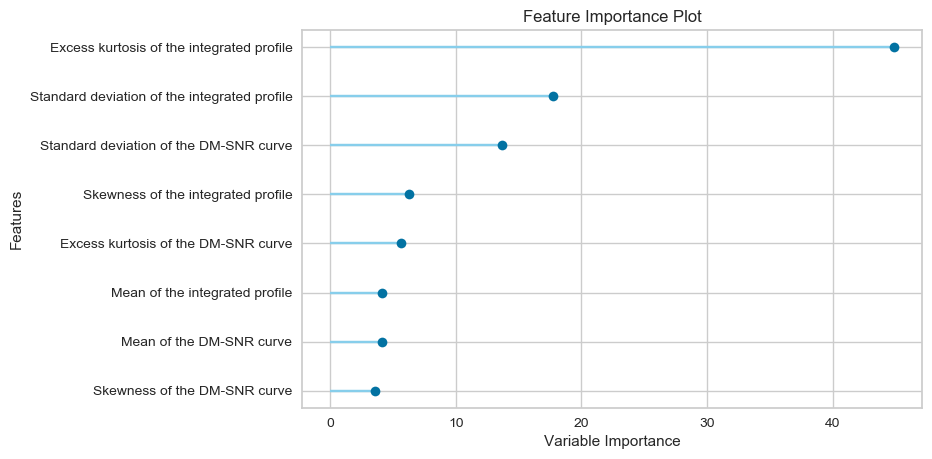

In [19]:
plot_model(estimator = tuned_cbc, plot = 'feature')

In [20]:
evaluate_model(tuned_cbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

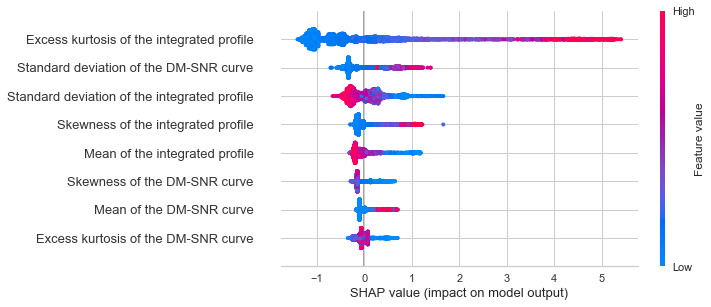

In [21]:
interpret_model(tuned_cbc)

In [26]:
predictions = predict_model(tuned_cbc)
predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9814,0.9817,0.8588,0.9427,0.8988,0.8886,0.8897


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,class,Label,Score
0,117.507812,40.788517,0.125276,0.773516,2.785953,16.660219,8.165360,82.956764,0,0,0.9955
1,36.742188,26.122681,5.601091,40.167103,42.984951,66.037285,1.617478,1.690876,1,1,0.9949
2,131.960938,44.180279,0.192329,0.406702,2.555184,17.639870,8.590099,87.220268,0,0,0.9940
3,109.140625,44.932022,0.262410,0.732817,2.146321,18.385490,9.859942,105.937729,1,0,0.9934
4,132.515625,51.123165,0.095649,-0.290893,3.505853,19.324654,7.022261,57.730999,0,0,0.9972
5,129.601562,46.673958,0.002779,0.270995,1.464883,12.928137,11.880445,173.782028,0,0,0.9983
6,132.632812,40.620361,0.121489,0.600191,2.289298,14.803900,9.237880,108.471375,0,0,0.9958
7,123.164062,51.911247,-0.077476,-0.618906,3.074415,19.094431,7.438655,62.915230,0,0,0.9980
8,110.273438,41.593590,0.221638,0.673348,3.936455,26.458796,7.272065,53.648792,0,0,0.9851
9,106.710938,45.834648,0.388326,0.730807,3.122910,18.822639,7.546147,64.784683,0,0,0.9842


In [27]:
save_model(tuned_cbc, model_name='model_cbc')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='class')),
                 ('fix_perfect', Remove_100(target='class')),
                 ('clean_names', Cl